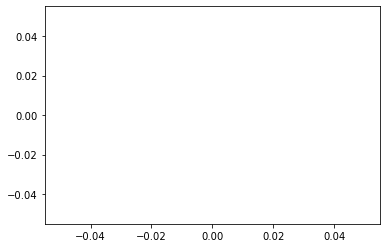

In [23]:
import matplotlib.pyplot as plt
plt.plot()
plt.show()

In [24]:
import unittest
from main2 import *
from fastapi.testclient import TestClient

In [25]:
app = FastAPI()
client = TestClient(app)
sample_image = "test.jpg"

In [26]:
IMG_SCALE = 1. / 255
IMG_MEAN = [.3405, .4747, .2418]
IMG_STD = [1, 1, 1]
INPUT_SIZE = 64
OUTPUT_STRIDE = 8

In [ ]:
@app.get("/")
async def read_main():
    return {"msg": "Hello World"}

In [21]:
with open('test.jpg', 'rb') as f:
    byte_im = f.read()
img = read_image(byte_im)
type(img)
img.shape[0]

2736

In [8]:
with open('test.jpg', 'rb') as f:
    byte_im = f.read()
img = read_image(byte_im)
img1 = read_image(byte_im)
img = resize_image(img)
img = normalize_image(img)
img = tensor_image(img)
img = zero_padding_image(img)

In [53]:
len(img1.size())

4

In [50]:
img1.shape

torch.Size([1, 3, 352, 480])

In [27]:
model = CountingModels(arc='tasselnetv2', input_size=64, output_stride=8)
model = nn.DataParallel(model)
model.load_state_dict(torch.load('density_model.pt'))
model = model.eval()

In [30]:
str(type(model))

"<class 'torch.nn.parallel.data_parallel.DataParallel'>"

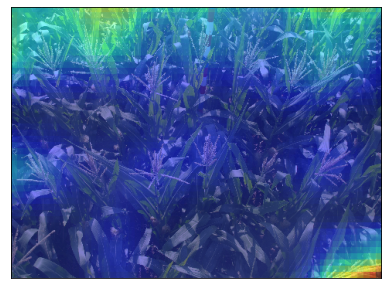

In [9]:
model = CountingModels(arc='tasselnetv2', input_size=64, output_stride=8)
model = nn.DataParallel(model)
model.load_state_dict(torch.load('density_model.pt'))
model = model.eval()
with torch.no_grad():
    output = model(img, is_normalize=False)
    output_save = output
    output = Normalizer.gpu_normalizer(output, img.size()[2], img.size()[3], INPUT_SIZE, OUTPUT_STRIDE)
    # postprocessing
    output = np.clip(output, 0, None)
    pdcount = output.sum()
    pdcount = math.floor(pdcount)
    density_img = density_map(output_save, img, img1)

In [8]:
str(type(density_img))

"<class 'bytes'>"

In [11]:
str(type(pdcount))

"<class 'int'>"

In [19]:
with open('test.jpg', 'rb') as f:
    byte_im = f.read()
img = read_image(byte_im)

In [22]:
img.shape[0]

2736